4900
(4900,)
4900
(4900,)
4900


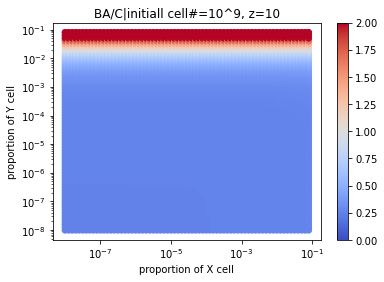

In [1]:
## CellDep-XY-BA-C

import numpy as np 
import matplotlib as mpl
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=10)
    ax.set_ylabel("$y$", fontsize=10)
    ax.set_zlabel("$z$", fontsize=10)

initial_N = 10**9
# initial_N = 1000
t_end = 1000
tana = 307
tanb = 567

aA = -0.17
bA = 0.045
cA = -0.13
fA = 0.022
gA = 0.0000001 # W-X
hA = 0.0000001 # W-Y
kA = 0.0000001 # W-Z
pA = 0.0000001 # X-Z
qA = 0.0000001 # Y-Z
paramsA = (aA, bA, cA, fA, gA, hA, kA, pA, qA )
aB = -0.32
bB = -0.15
cB = 0.024
fB = 0.022
gB = 0.0000001 # W-X
hB = 0.0000001 # W-Y
kB = 0.0000001 # W-Z
pB = 0.0000001 # X-Z
qB = 0.0000001 # Y-Z
paramsB = (aB, bB, cB, fB, gB, hB, kB, pB, qB )
aC = -0.064
bC = -0.0335
cC = -0.0335
fC = 0.022
gC = hC = kC = pC = qC =0.0000001
paramsC = (aC, bC, cC, fC, gC, hC, kC, pC, qC)

finalnumbera = list()
finalnumberc = list()
zratio = list()
xprop = list()
yprop = list()

for nx in np.arange(1, 8, 0.1):
    for ny in np.arange(1, 8, 0.1):
        xprop.append((10**nx)/initial_N)
        yprop.append((10**ny)/initial_N)
        list_ta = np.arange(0, tana, 0.01)
        list_t1a = np.arange(tana, t_end, 0.01)
        list_tc = np.arange(0, t_end, 0.01)
        cell_init = [initial_N - 10**nx - 10**ny - 10, 10**nx, 10**ny, 10]
        cellsa = odeint(func, cell_init, list_ta, args = paramsB)
        ia = len(list_ta)-1
        cell1_inita = [cellsa[ia, 0], cellsa[ia, 1], cellsa[ia, 2], cellsa[ia, 3]]
        cell1a = odeint(func, cell1_inita, list_t1a, args = paramsA)
        celltotal1a = cell1a[:, 0] + cell1a[:, 1] + cell1a[:, 2] + cell1a[:, 3]
        finalnumbera.append(celltotal1a[-1])
        cellsc = odeint(func, cell_init, list_tc, args = paramsC)
        celltotalc = cellsc[:, 0] + cellsc[:, 1] + cellsc[:, 2] + cellsc[:, 3]
        finalnumberc.append(celltotalc[-1])

zratio = [finalnumbera/finalnumberc for finalnumbera, finalnumberc in zip(finalnumbera, finalnumberc)]

X = np.array(xprop)
print(len(xprop))
print(X.shape)
Y = np.array(yprop)
print(len(yprop))
print(Y.shape)
# X, Y = np.meshgrid(X, Y)
Z = np.array(zratio, dtype=float)
print(len(zratio))

cmap_thresholds = [0, 2, np.inf]
colors = ['blue', 'white', 'red']

plt.scatter(X, Y, c=Z, cmap=plt.cm.get_cmap('coolwarm'), vmin=0, vmax=2)
plt.yscale('log')
plt.xscale('log')
plt.colorbar()  # Add a colorbar for reference
plt.xlabel('proportion of X cell')
plt.ylabel('proportion of Y cell')
plt.title('BA/C|initiall cell#=10^9, z=10')

plt.show()